In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
!pip install ucimlrepo

## Task 1: Fetch/Load the datasets + Clean and Analyze

### Dataset 1: NHANES age prediction subset

Loading dataset

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 1
nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
nhanes_age_prediction_subset_X = nhanes_age_prediction_subset.data.features
nhanes_age_prediction_subset_y = nhanes_age_prediction_subset.data.targets

#Save raw data for DT top 5 features
araw=nhanes_age_prediction_subset_X.to_numpy()
print(araw)
# metadata
print(nhanes_age_prediction_subset.metadata)

# variable information
print(nhanes_age_prediction_subset.variables)


[[  2.     2.    35.7  ...   2.   150.    14.91]
 [  2.     2.    20.3  ...   2.    80.     3.85]
 [  1.     2.    23.2  ...   2.    68.     6.14]
 ...
 [  1.     2.    23.7  ...   2.   124.    21.41]
 [  2.     2.    27.4  ...   2.   108.     4.99]
 [  1.     2.    24.5  ...   2.   108.     3.76]]
{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting re

Analyzing

In [5]:
print(nhanes_age_prediction_subset_X.head(10))
print(nhanes_age_prediction_subset_X.shape)
#nhanes_age_prediction_subset_X.isnull().sum() no null values
#nhanes_age_prediction_subset_y.isnull().sum() no null values

   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4       2.0     1.0    35.9   103.0     2.0    81.0  10.92
5       1.0     2.0    23.6   110.0     2.0   100.0   6.08
6       1.0     2.0    38.7    94.0     2.0   202.0  21.11
7       2.0     2.0    38.3   107.0     2.0   164.0  20.93
8       1.0     2.0    38.9    89.0     2.0   113.0  17.47
9       1.0     1.0    28.9    90.0     2.0    95.0   3.24
(2278, 7)


In [6]:
print(nhanes_age_prediction_subset_y.head(10))
print(nhanes_age_prediction_subset_y.shape)
nhanes_age_prediction_subset_y['age_group'].value_counts()

  age_group
0     Adult
1     Adult
2     Adult
3     Adult
4     Adult
5     Adult
6     Adult
7     Adult
8    Senior
9     Adult
(2278, 1)


Adult     1914
Senior     364
Name: age_group, dtype: int64

In [7]:
# from scipy import stats
# for column in nhanes_age_prediction_subset_X:
#   nhanes_age_prediction_subset_X[column] = stats.zscore(nhanes_age_prediction_subset_X[column])

In [8]:
# analyzing dataset 1
# get positive group (senior)
senior_subset_y = nhanes_age_prediction_subset_y[nhanes_age_prediction_subset_y.age_group =='Senior']
senior_idx = list(senior_subset_y.index.values)
print(senior_idx)
senior_subset_X = nhanes_age_prediction_subset_X.iloc[senior_idx]
print(senior_subset_X)

# get negative group (adult)
adult_subset_y = nhanes_age_prediction_subset_y[nhanes_age_prediction_subset_y.age_group =='Adult']
adult_idx = list(adult_subset_y.index.values)
adult_subset_X = nhanes_age_prediction_subset_X.iloc[adult_idx]
print(adult_subset_X)

[8, 12, 14, 15, 18, 27, 34, 54, 60, 69, 88, 93, 98, 103, 113, 115, 119, 123, 136, 143, 160, 162, 165, 166, 167, 176, 180, 186, 203, 205, 207, 212, 220, 224, 238, 239, 248, 257, 289, 296, 311, 318, 325, 332, 342, 349, 353, 364, 365, 367, 369, 374, 376, 386, 389, 408, 409, 425, 426, 429, 435, 438, 444, 470, 473, 477, 478, 481, 492, 512, 513, 514, 521, 522, 525, 529, 535, 548, 554, 556, 560, 562, 565, 569, 590, 593, 602, 612, 617, 623, 624, 626, 631, 637, 638, 640, 641, 642, 643, 650, 653, 656, 657, 664, 676, 677, 684, 695, 696, 702, 708, 714, 724, 729, 745, 748, 756, 760, 769, 776, 777, 778, 782, 786, 788, 799, 807, 816, 817, 829, 839, 841, 850, 853, 854, 878, 879, 884, 885, 888, 896, 900, 909, 912, 914, 918, 920, 924, 929, 933, 935, 936, 942, 957, 969, 974, 1001, 1016, 1023, 1024, 1041, 1043, 1051, 1062, 1067, 1070, 1072, 1082, 1095, 1097, 1103, 1110, 1113, 1124, 1126, 1134, 1138, 1140, 1147, 1153, 1154, 1158, 1164, 1167, 1174, 1179, 1189, 1190, 1209, 1210, 1219, 1222, 1233, 1237, 1239,

In [9]:
# mean of each feature for positive group (senior)
senior_means = senior_subset_X.describe().loc['mean']
#print(senior_means)

# mean of each feature for negative group (adult)
adult_means = adult_subset_X.describe().loc['mean']
#print(adult_means)

# combine into 1 dataframe
nhanes_means = pd.concat([senior_means, adult_means], axis=1)
nhanes_means.columns = ['senior means', 'adult means']
print(nhanes_means)

          senior means  adult means
RIAGENDR      1.508242     1.512017
PAQ605        1.909341     1.806165
BMXBMI       27.886264    27.968286
LBXGLU      104.329670    98.644723
DIQ010        2.027473     2.014107
LBXGLT      141.208791   109.990596
LBXIN        10.405247    12.106661


In [10]:
# squared difference of means for each feature
nhanes_square_diff = np.square(nhanes_means['senior means'] - nhanes_means['adult means'])
# print(nhanes_square_diff)
nhanes_square_diff.sort_values(ascending=False)

LBXGLT      974.575736
LBXGLU       32.318625
LBXIN         2.894810
PAQ605        0.010645
BMXBMI        0.006728
DIQ010        0.000179
RIAGENDR      0.000014
dtype: float64

Preprocessing: dropping features

In [11]:
# dropping features that are not as correlated
nhanes_age_prediction_subset_X = nhanes_age_prediction_subset_X.drop(['BMXBMI', 'DIQ010', 'RIAGENDR', 'PAQ605'], axis=1)
nhanes_age_prediction_subset_X

,LBXGLU,LBXGLT,LBXIN
0,110.0,150.0,14.91
1,89.0,80.0,3.85
2,89.0,68.0,6.14
3,104.0,84.0,16.15
4,103.0,81.0,10.92
...,...,...,...
2273,100.0,73.0,6.53
2274,93.0,208.0,13.02
2275,103.0,124.0,21.41
2276,90.0,108.0,4.99


Preprocessing: standardizing features

In [12]:
from sklearn import preprocessing
# standardize features option 1
nhanes_age_prediction_subset_X_scaled = preprocessing.scale(nhanes_age_prediction_subset_X)
print(nhanes_age_prediction_subset_X_scaled)

[[ 0.58408464  0.74432296  0.31648741]
 [-0.59002415 -0.74342728 -0.82176167]
 [-0.59002415 -0.99847018 -0.58608442]
 ...
 [ 0.19271504  0.19173001  0.98544031]
 [-0.53411421 -0.14832719 -0.70443762]
 [ 0.47226475 -0.14832719 -0.83102409]]


Preprocessing: integer encoding

In [13]:
# convert class values into ints
nhanes_age_prediction_subset_y_encoded = nhanes_age_prediction_subset_y['age_group'].apply(lambda x: 0 if x == "Adult" else 1)
print(nhanes_age_prediction_subset_y_encoded.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: age_group, dtype: int64


### Dataset 2: Breast cancer Wisconsin dataset

Loading dataset

In [14]:
# fetch dataset 2
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
breast_cancer_wisconsin_original_X = breast_cancer_wisconsin_original.data.features
breast_cancer_wisconsin_original_y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

Analyzing

In [15]:
breast_cancer_wisconsin_original_X.isnull().sum() # has null values
# breast_cancer_wisconsin_original_y.isnull().sum() no null values

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

Preprocessing: removing row with null values

In [16]:
# removing rows with null values
breast_cancer_wisconsin_original_X.dropna()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [17]:
# analyzing dataset 2
# get positive group (malignant)
malignant_y = breast_cancer_wisconsin_original_y[breast_cancer_wisconsin_original_y.Class == 4]
malignant_idx = list(malignant_y.index.values)
malignant_X = breast_cancer_wisconsin_original_X.iloc[malignant_idx]
print(malignant_X)

# get negative group (benign)
benign_y = breast_cancer_wisconsin_original_y[breast_cancer_wisconsin_original_y.Class == 2]
benign_idx = list(benign_y.index.values)
benign_X = breast_cancer_wisconsin_original_X.iloc[benign_idx]
print(benign_X)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
5                  8                       10                        10   
12                 5                        3                         3   
14                 8                        7                         5   
15                 7                        4                         6   
18                10                        7                         7   
..               ...                      ...                       ...   
681                5                       10                        10   
691                5                       10                        10   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
5                    8         

In [18]:
# mean of each feature for positive group (malignant)
malignant_means = malignant_X.describe().loc['mean']
#print(malignant_means)

# mean of each feature for negative group (benign)
benign_means = benign_X.describe().loc['mean']
#print(benign_means)

# combine into 1 dataframe
breast_cancer_df_means = pd.concat([malignant_means, benign_means], axis=1)
breast_cancer_df_means.columns = ['malignant means', 'benign means']
print(breast_cancer_df_means)

                             malignant means  benign means
Clump_thickness                     7.195021      2.956332
Uniformity_of_cell_size             6.572614      1.325328
Uniformity_of_cell_shape            6.560166      1.443231
Marginal_adhesion                   5.547718      1.364629
Single_epithelial_cell_size         5.298755      2.120087
Bare_nuclei                         7.627615      1.346847
Bland_chromatin                     5.979253      2.100437
Normal_nucleoli                     5.863071      1.290393
Mitoses                             2.589212      1.063319


In [19]:
# squared difference of means for each feature
breast_cancer_square_diff = np.square(breast_cancer_df_means['malignant means'] - breast_cancer_df_means['benign means'])
breast_cancer_square_diff.sort_values(ascending=False)

Bare_nuclei                    39.448049
Uniformity_of_cell_size        27.534017
Uniformity_of_cell_shape       26.183019
Normal_nucleoli                20.909380
Clump_thickness                17.966483
Marginal_adhesion              17.498234
Bland_chromatin                15.045217
Single_epithelial_cell_size    10.103929
Mitoses                         2.328349
dtype: float64

Preprocessing: dropping feature

In [20]:
# dropping features that are not as correlated
breast_cancer_wisconsin_original_X = breast_cancer_wisconsin_original_X.drop(['Mitoses'], axis=1)
breast_cancer_wisconsin_original_X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli
0,5,1,1,1,2,1.0,3,1
1,5,4,4,5,7,10.0,3,2
2,3,1,1,1,2,2.0,3,1
3,6,8,8,1,3,4.0,3,7
4,4,1,1,3,2,1.0,3,1
...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1
695,2,1,1,1,2,1.0,1,1
696,5,10,10,3,7,3.0,8,10
697,4,8,6,4,3,4.0,10,6


Preprocessing: integer encoding {0,1}

In [21]:
# convert class values into 0 or 1 (instead of 2 or 4)
#print(breast_cancer_wisconsin_original_y.head(20))
breast_cancer_wisconsin_original_y_encoded = breast_cancer_wisconsin_original_y["Class"].apply(lambda x: 0 if x == 2 else 1)
print(breast_cancer_wisconsin_original_y_encoded.head(20))

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    1
16    0
17    0
18    1
19    0
Name: Class, dtype: int64


In [22]:
# convert X dataframe to numpy array
breast_cancer_wisconsin_original_X = breast_cancer_wisconsin_original_X.to_numpy()
breast_cancer_wisconsin_original_X

array([[ 5.,  1.,  1., ...,  1.,  3.,  1.],
       [ 5.,  4.,  4., ..., 10.,  3.,  2.],
       [ 3.,  1.,  1., ...,  2.,  3.,  1.],
       ...,
       [ 5., 10., 10., ...,  3.,  8., 10.],
       [ 4.,  8.,  6., ...,  4., 10.,  6.],
       [ 4.,  8.,  8., ...,  5., 10.,  4.]])

## Task 2: KNN and DT

KNN class

In [23]:
# metric we will use to measure similarity (to experiment)
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return

    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = self.C = np.max(y) + 1
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # print(knns[i,:])
            #print(self.y[knns[i:]])
            y_prob[i,:] = np.bincount(self.y[knns[i:]][0], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

Decision Tree class



In [24]:
bvalues=breast_cancer_wisconsin_original_X
btargets=breast_cancer_wisconsin_original_y_encoded

avalues=nhanes_age_prediction_subset_X_scaled
atargets=nhanes_age_prediction_subset_y_encoded

In [25]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [26]:
# representing a node in our decision tree
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [27]:
# for a node, considers all possible feature-value combinations for splitting the data in a way that minimizes the cost acc to cost_fn
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [28]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1, prt_ftr=False):
        self.max_depth = max_depth      #maximum depth for termination
        self.root = None                #stores the root of the decision tree
        self.cost_fn = cost_fn          #stores the cost function of the decision tree
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        self.print_feature = prt_ftr

    def fit(self, data, labels):

        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)

        return self

    def _fit_tree(self, node):

        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        if self.print_feature:
          print(f'best feature: {split_feature}, value {split_value}, cost {cost}')

        # if split_feature<9:
        #   feat_count[split_feature]=feat_count[split_feature]+1
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs

Function for evaluating accuracy

In [29]:
def evaluate_acc(y_true, y_pred):
  return np.sum(y_pred==y_true)/len(y_true)

## Task 3: Experiments

### KNN

Splitting the data into 3 sets: training, validation and test

In [30]:
from sklearn import model_selection

# NHANES dataset
nhanes_X_train, nhanes_X_test, nhanes_y_train, nhanes_y_test = model_selection.train_test_split(nhanes_age_prediction_subset_X_scaled, nhanes_age_prediction_subset_y_encoded, test_size=0.1, random_state=1, shuffle=True)
print(nhanes_X_test.shape)
#print(nhanes_X_train.shape)
nhanes_X_train, nhanes_X_val, nhanes_y_train, nhanes_y_val = model_selection.train_test_split(nhanes_X_train, nhanes_y_train, test_size=0.2, random_state=1, shuffle=True)
print(nhanes_X_val.shape)
print(nhanes_X_train.shape)
# print(nhanes_X_train)
# print(nhanes_y_train)
nhanes_y_train = nhanes_y_train.to_numpy()
nhanes_y_val = nhanes_y_val.to_numpy()
nhanes_y_test = nhanes_y_test.to_numpy()
print(nhanes_y_train.shape)

# Breast cancer dataset
breast_cancer_X_train, breast_cancer_X_test, breast_cancer_y_train, breast_cancer_y_test = model_selection.train_test_split(breast_cancer_wisconsin_original_X, breast_cancer_wisconsin_original_y_encoded, test_size=0.1, random_state=1, shuffle=True)
print(breast_cancer_X_test.shape)
breast_cancer_X_train, breast_cancer_X_val, breast_cancer_y_train, breast_cancer_y_val = model_selection.train_test_split(breast_cancer_X_train, breast_cancer_y_train, test_size=0.2, random_state=1, shuffle=True)
print(breast_cancer_X_val.shape)
print(breast_cancer_X_train.shape)
breast_cancer_y_train = breast_cancer_y_train.to_numpy()
breast_cancer_y_val = breast_cancer_y_val.to_numpy()
breast_cancer_y_test = breast_cancer_y_test.to_numpy()
print(breast_cancer_y_train.shape)

(228, 3)
(410, 3)
(1640, 3)
(1640,)
(70, 8)
(126, 8)
(503, 8)
(503,)


Best K on NHANES dataset with Euclidean distance function

best K = 4, test accuracy = 0.881578947368421


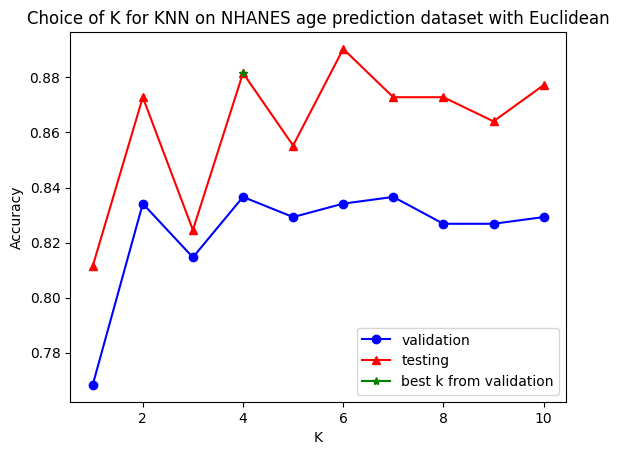

In [31]:
# predict using validation set to choose best K
model_choices=[]
valid_acc = []
test_acc = []

for k in range(1,11):
    knn = KNN(K=k, ) # create a KNN object (OOP)
    knn.fit(nhanes_X_train, nhanes_y_train)
    y_train_va_prob,_ = knn.predict(nhanes_X_val)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    val_accuracy = evaluate_acc(nhanes_y_val, y_train_va_pred)
    y_test_prob,_ = knn.predict(nhanes_X_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = evaluate_acc(nhanes_y_test, y_test_pred)
    model_choices.append(k)
    valid_acc.append(val_accuracy)
    test_acc.append(test_accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(nhanes_X_train, nhanes_y_train).predict(nhanes_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = evaluate_acc(nhanes_y_test, y_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(model_choices, test_acc, marker='^', color='red', label='testing')
plt.plot(best_valid_K, test_accuracy, marker='*', color='green', label='best k from validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Choice of K for KNN on NHANES age prediction dataset with Euclidean")
plt.savefig('nhanes_age_prediction_KNN_chooseK_E.png',dpi=300,bbox_inches='tight')


Best K for NHANES dataset with Manhattan distance function

best K = 6, test accuracy = 0.881578947368421


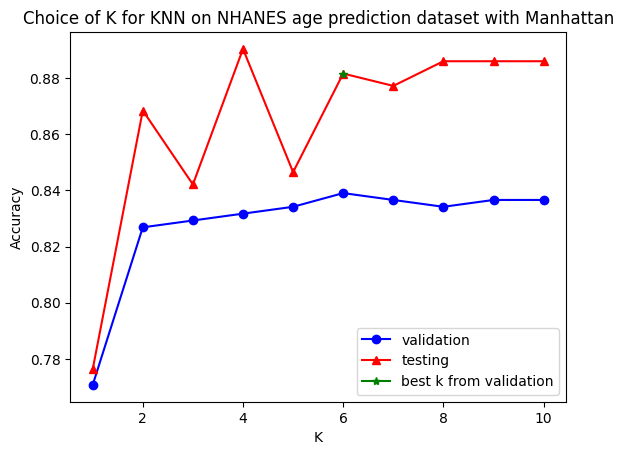

In [32]:
# predict using validation set to choose best K
model_choices=[]
valid_acc = []
test_acc = []

for k in range(1,11):
    knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
    knn.fit(nhanes_X_train, nhanes_y_train)
    y_train_va_prob,_ = knn.predict(nhanes_X_val)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    val_accuracy = evaluate_acc(nhanes_y_val, y_train_va_pred)
    y_test_prob,_ = knn.predict(nhanes_X_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = evaluate_acc(nhanes_y_test, y_test_pred)
    model_choices.append(k)
    valid_acc.append(val_accuracy)
    test_acc.append(test_accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn=manhattan)
y_test_prob,_ = knn.fit(nhanes_X_train, nhanes_y_train).predict(nhanes_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = evaluate_acc(nhanes_y_test, y_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(model_choices, test_acc, marker='^', color='red', label='testing')
plt.plot(best_valid_K, test_accuracy, marker='*', color='green', label='best k from validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Choice of K for KNN on NHANES age prediction dataset with Manhattan")
plt.savefig('nhanes_age_prediction_KNN_chooseK_M.png',dpi=300,bbox_inches='tight')

Plotting results for K=6 with NHANES dataset using Manhattan distance function

(note: features were standardized, so numbers are not the originals)

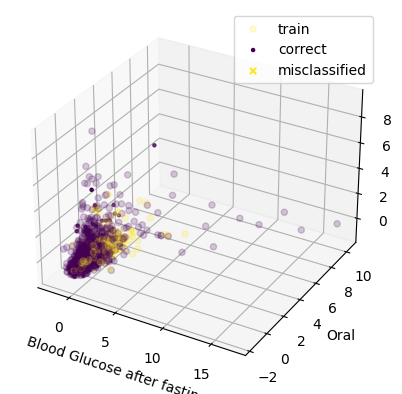

In [33]:
# arbitrarily chose Manhattan since both Euclidean and Manhattan had the same test accuracy for their respective best K
knn = KNN(K=6, dist_fn=manhattan)
y_test_prob,_ = knn.fit(nhanes_X_train, nhanes_y_train).predict(nhanes_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = nhanes_y_test == y_test_pred
incorrect = np.logical_not(correct)

#visualization of the points
ax.scatter(nhanes_X_train[:,0], nhanes_X_train[:,1], nhanes_X_train[:,2], c=nhanes_y_train, marker='o', alpha=.2, label='train')
ax.scatter(nhanes_X_test[correct,0], nhanes_X_test[correct,1], nhanes_X_test[correct,2], marker='.', c=y_test_pred[correct], label='correct')
ax.scatter(nhanes_X_test[incorrect,0], nhanes_X_test[incorrect,1], nhanes_X_test[incorrect,2], marker='x', c=nhanes_y_test[incorrect], label='misclassified')

ax.set_xlabel('Blood Glucose after fasting')
ax.set_ylabel('Oral')
ax.set_zlabel('Blood Insulin levels')
ax.legend()
plt.savefig('nhanes_KNN'+str(6)+'.png',dpi=300)
plt.show() # labels got a bit cut off here but can check the saved file instead to see full picture

From the plot above, it seems like most of the data is concentrated in an area with some outliers lying outside of it.

Best K on breast cancer dataset with Euclidean distance function

best K = 7, test accuracy = 0.9571428571428572


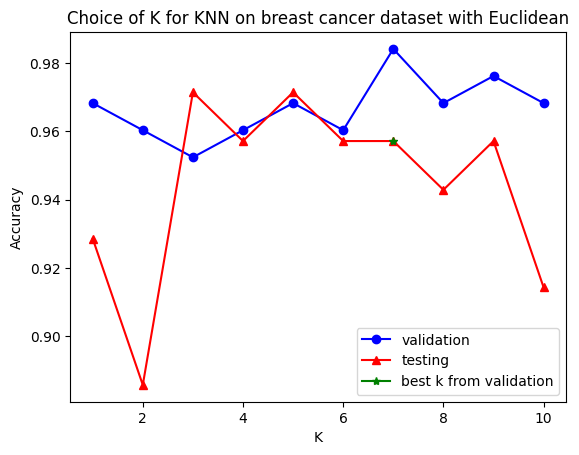

In [34]:
# predict using validation set to choose best K
model_choices=[]
valid_acc = []
test_acc = []

for k in range(1,11):
    knn = KNN(K=k) # create a KNN object (OOP)
    knn.fit(breast_cancer_X_train, breast_cancer_y_train)
    y_train_va_prob,_ = knn.predict(breast_cancer_X_val)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    val_accuracy = evaluate_acc(breast_cancer_y_val, y_train_va_pred)
    y_test_prob,_ = knn.predict(breast_cancer_X_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = evaluate_acc(breast_cancer_y_test, y_test_pred)
    model_choices.append(k)
    valid_acc.append(val_accuracy)
    test_acc.append(test_accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K)
y_test_prob,_ = knn.fit(breast_cancer_X_train, breast_cancer_y_train).predict(breast_cancer_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = evaluate_acc(breast_cancer_y_test, y_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(model_choices, test_acc, marker='^', color='red', label='testing')
plt.plot(best_valid_K, test_accuracy, marker='*', color='green', label='best k from validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Choice of K for KNN on breast cancer dataset with Euclidean")
plt.savefig('breast_cancer_prediction_KNN_chooseK_E.png',dpi=300,bbox_inches='tight')

Best K on breast cancer dataset with Manhattan distance function

best K = 9, test accuracy = 0.9428571428571428


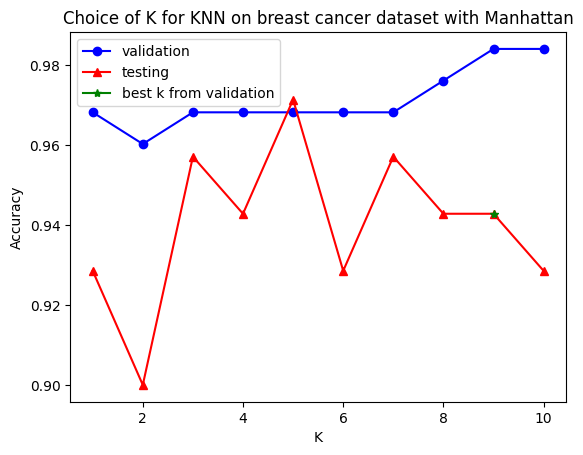

In [35]:
# predict using validation set to choose best K
model_choices=[]
valid_acc = []
test_acc = []

for k in range(1,11):
    knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
    knn.fit(breast_cancer_X_train, breast_cancer_y_train)
    y_train_va_prob,_ = knn.predict(breast_cancer_X_val)
    y_train_va_pred = np.argmax(y_train_va_prob,axis=-1)
    val_accuracy = evaluate_acc(breast_cancer_y_val, y_train_va_pred)
    y_test_prob,_ = knn.predict(breast_cancer_X_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_accuracy = evaluate_acc(breast_cancer_y_test, y_test_pred)
    model_choices.append(k)
    valid_acc.append(val_accuracy)
    test_acc.append(test_accuracy)

# use the best K to predict test data
best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
knn = KNN(K=best_valid_K, dist_fn=manhattan)
y_test_prob,_ = knn.fit(breast_cancer_X_train, breast_cancer_y_train).predict(breast_cancer_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
test_accuracy = evaluate_acc(breast_cancer_y_test, y_test_pred)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')

plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
plt.plot(model_choices, test_acc, marker='^', color='red', label='testing')
plt.plot(best_valid_K, test_accuracy, marker='*', color='green', label='best k from validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.title("Choice of K for KNN on breast cancer dataset with Manhattan")
plt.savefig('breast_cancer_prediction_KNN_chooseK_M.png',dpi=300,bbox_inches='tight')

### DT

In [36]:
#split and define labels
blabels=set(btargets)
alabels=set(atargets)

# Split half of Data into train and half into test
bx_train, by_train = bvalues[:((len(bvalues)//2)+1)], btargets[:((len(bvalues)//2)+1)]
bx_test, by_test = bvalues[((len(bvalues)//2)):], btargets[((len(bvalues)//2)):]

ax_train, ay_train = avalues[:((len(avalues)//2))], atargets[:((len(avalues)//2))]
ax_test, ay_test = avalues[((len(avalues)//2)):], atargets[((len(avalues)//2)):]


In [37]:
# Try with missclassification
tree_a = DecisionTree(max_depth=20)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=20)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.7892888498683055
0.94


In [38]:
#Try with entropy
tree_a = DecisionTree(max_depth=20, cost_fn=cost_entropy)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=20, cost_fn=cost_entropy)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.7594381035996488
0.9514285714285714


In [39]:
# Try with Gini index
tree_a = DecisionTree(max_depth=20, cost_fn=cost_gini_index)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=20, cost_fn=cost_gini_index)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.7550482879719052
0.9542857142857143


In [40]:
# Max tree_depth = 1 and missclassification
tree_a = DecisionTree(max_depth=1)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=1)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.835820895522388
0.9257142857142857


In [41]:
# Max tree_depth = 5 and missclassification
tree_a = DecisionTree(max_depth=5)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=5)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.835820895522388
0.9514285714285714


In [42]:
# Max tree_depth = 10 and missclassification
tree_a = DecisionTree(max_depth=10)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=10)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.8287971905179983
0.94


In [43]:
# Max tree_depth = 15 and missclassification
tree_a = DecisionTree(max_depth=15)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

tree_b = DecisionTree(max_depth=15)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

0.810359964881475
0.94


In [44]:
# Re split Data to use all features for age
ax_train, ay_train = araw[:((len(araw)//2))], atargets[:((len(araw)//2))]
ax_test, ay_test = araw[((len(avalues)//2)):], atargets[((len(araw)//2)):]


tree_a = DecisionTree(max_depth=10, prt_ftr=True)
probs_test = tree_a.fit(ax_train, ay_train).predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_a,ay_test))

best feature: 2, value 15.0, cost 0.15539947322212463
best feature: 0, value 1.5, cost 0.0
best feature: 1, value 1.0, cost 0.15539947322212463
best feature: 5, value 250.0, cost 0.011413520632133453
best feature: 2, value 17.4, cost 0.011413520632133441
best feature: 2, value 39.45, cost 0.011413520632133443
best feature: 2, value 39.1, cost 0.01053555750658472
best feature: 4, value 1.5, cost 0.009657594381035991
best feature: 2, value 18.1, cost 0.00965759438103599
best feature: 0, value 1.5, cost 0.0
best feature: 3, value 103.5, cost 0.0
best feature: 2, value 24.35, cost 0.00965759438103599
best feature: 3, value 107.0, cost 0.0026338893766461795
best feature: 2, value 26.3, cost 0.006145741878841082
best feature: 0, value 1.0, cost 0.0
best feature: 2, value 40.15, cost 0.0
best feature: 2, value 40.7, cost 0.0
best feature: 2, value 41.15, cost 0.0
best feature: 2, value 42.25, cost 0.0
best feature: 2, value 39.75, cost 0.0
best feature: 2, value 40.45, cost 0.0
best feature: 

With max tree size = 10, for the age data set the top 5 features are, in order, 2,3,0,5,6

In [47]:
#Remake breast cancer tree  tree while counting number of features
tree_b = DecisionTree(max_depth=10, prt_ftr=True)
probs_test = tree_b.fit(bx_train, by_train).predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
print(evaluate_acc(y_pred_b,by_test))

best feature: 1, value 2.0, cost 0.07999999999999997
best feature: 0, value 6.0, cost 0.017142857142857123
best feature: 5, value 5.0, cost 0.008571428571428556
best feature: 7, value 9.0, cost 0.0028571428571428597
best feature: 3, value 3.0, cost 0.0028571428571428407
best feature: 4, value 2.0, cost 0.002857142857142842
best feature: 0, value 2.0, cost 0.002857142857142847
best feature: 0, value 1.0, cost 0.0
best feature: 1, value 1.0, cost 0.0
best feature: 2, value 1.0, cost 0.0
best feature: 2, value 2.0, cost 0.0
best feature: 1, value 1.0, cost 0.0
best feature: 2, value 1.0, cost 0.0
best feature: 6, value 3.0, cost 0.002857142857142847
best feature: 5, value 3.0, cost 0.0
best feature: 0, value 3.0, cost 0.0
best feature: 0, value 3.0, cost 0.0
best feature: 5, value 3.5, cost 0.0
best feature: 0, value 1.0, cost 0.0
best feature: 4, value 3.5, cost 0.0
best feature: 4, value 4.5, cost 0.0
best feature: 4, value 7.5, cost 0.0
best feature: 0, value 2.0, cost 0.0
best feature

With max tree size = 10, for the cancer data set the top 5 features are, in order, 0,2,1,4, and 5

### Reciever Operating Characteristic (ROC) Curve

In [48]:
from sklearn.metrics import confusion_matrix

cancer_knn_cm = confusion_matrix(breast_cancer_y_test, y_test_pred)
cancer_knn_cm_df = pd.DataFrame(cancer_knn_cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cancer_knn_cm_df)

cancer_dt_cm = confusion_matrix(y_pred_b, by_test)
cancer_dt_cm_df = pd.DataFrame(cancer_dt_cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cancer_dt_cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                  45                   1
Actual Positive                   3                  21
                 Predicted Negative  Predicted Positive
Actual Negative                 252                   6
Actual Positive                  15                  77


ROC Curve for NHANES Dataset providing Comparison for KNN with K = 4 and using Euclidean Distance and
DT with max depth 5, and using Misclassification Rate

                 Predicted Negative  Predicted Positive
Actual Negative                 196                   7
Actual Positive                  20                   5
KNN Model Accuracy on NHANES Dataset: 
0.881578947368421
                 Predicted Negative  Predicted Positive
Actual Negative                 913                  39
Actual Positive                 174                  13
Decision Tree Model Accuracy on NHANES Dataset: 
0.8129938542581212


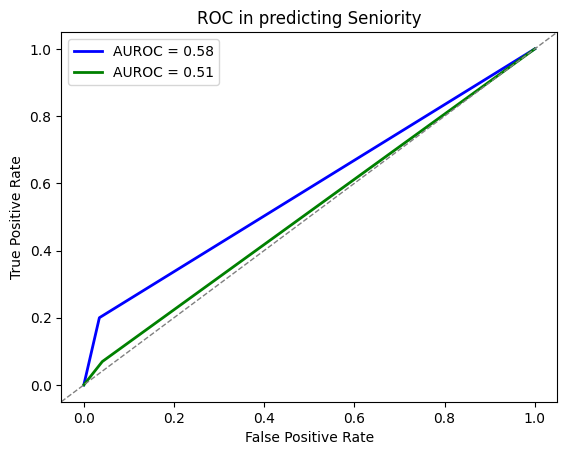

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# K-Nearest Neighbour with k: 4 and similarity function: Euclidean Function
nhanes_knn = KNN(4)
nhanes_knn.fit(nhanes_X_train, nhanes_y_train)
y_test_prob,_ = nhanes_knn.predict(nhanes_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
nhanes_knn_fpr, nhanes_knn_tpr, _ = roc_curve(nhanes_y_test, y_test_pred)
nhanes_knn_roc_auc = roc_auc_score(nhanes_y_test, y_test_pred)
nhanes_knn_cm = confusion_matrix(nhanes_y_test, y_test_pred)
nhanes_knn_cm_df = pd.DataFrame(nhanes_knn_cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(nhanes_knn_cm_df)
print("KNN Model Accuracy on NHANES Dataset: ")
print(evaluate_acc(nhanes_y_test, y_test_pred))

# Decision Tree for NHANES Dataset with max depth: 5 and cost function: Misclassification Rate
nhanes_dt = DecisionTree(max_depth=10)
nhanes_dt.fit(ax_train, ay_train)
probs_test = nhanes_dt.predict(ax_test)
y_pred_a = np.argmax(probs_test,1)
nhanes_dt_fpr, nhanes_dt_tpr, _ = roc_curve(ay_test, y_pred_a)
nhanes_dt_roc_auc = roc_auc_score(ay_test, y_pred_a)
nhanes_dt_cm = confusion_matrix(ay_test, y_pred_a)
nhanes_dt_cm_df = pd.DataFrame(nhanes_dt_cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(nhanes_dt_cm_df)
print("Decision Tree Model Accuracy on NHANES Dataset: ")
print(evaluate_acc(ay_test, y_pred_a))


plt.clf()
plt.plot(nhanes_knn_fpr, nhanes_knn_tpr, "b-", lw=2, label="AUROC = %0.2f"%nhanes_knn_roc_auc)
plt.plot(nhanes_dt_fpr, nhanes_dt_tpr, "g-", lw=2, label="AUROC = %0.2f"%nhanes_dt_roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting Seniority')
plt.legend(loc="best")
plt.savefig("roc_curve_nhanes.png",bbox_inches='tight', dpi=300)

ROC Curve for Breast Cancer Dataset providing Comparison for KNN with K = 7 and using Euclidean Distance and DT with max depth 5, and using Misclassification Rate

                 Predicted Negative  Predicted Positive
Actual Negative                  45                   1
Actual Positive                   2                  22
KNN Model Accuracy on Cancer Dataset: 
0.9571428571428572
                 Predicted Negative  Predicted Positive
Actual Negative                 254                   4
Actual Positive                  13                  79
Decision Tree Model Accuracy on Cancer Dataset: 
0.9514285714285714


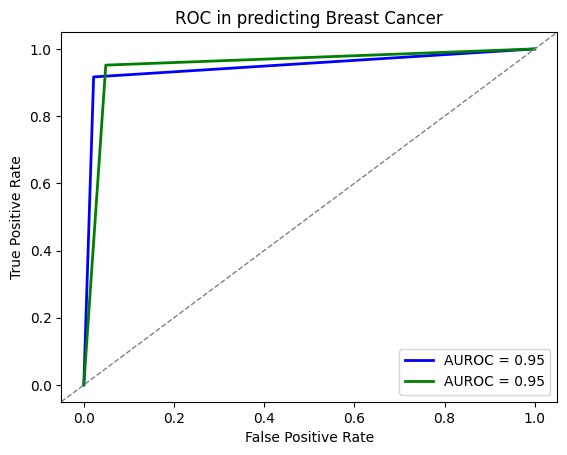

In [50]:
# K-Nearest Neighbour with k: 7 and similarity function: Euclidean Function
cancer_knn = KNN(7)
cancer_knn.fit(breast_cancer_X_train, breast_cancer_y_train)
y_test_prob,_ = cancer_knn.predict(breast_cancer_X_test)
y_test_pred = np.argmax(y_test_prob, axis=-1)
cancer_knn_fpr, cancer_knn_tpr, _ = roc_curve(breast_cancer_y_test, y_test_pred)
cancer_knn_roc_auc = roc_auc_score(breast_cancer_y_test, y_test_pred)
cancer_knn_cm = confusion_matrix(breast_cancer_y_test, y_test_pred)
cancer_knn_cm_df = pd.DataFrame(cancer_knn_cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cancer_knn_cm_df)
print("KNN Model Accuracy on Cancer Dataset: ")
print(evaluate_acc(breast_cancer_y_test, y_test_pred))


# Decision Tree for Breast Cancer Dataset with max depth: 5 and cost function: Misclassification Rate
cancer_dt = DecisionTree(max_depth=5)
cancer_dt.fit(bx_train, by_train)
probs_test = cancer_dt.predict(bx_test)
y_pred_b = np.argmax(probs_test,1)
cancer_dt_fpr, cancer_dt_tpr, _ = roc_curve(by_test, y_pred_b)
cancer_dt_roc_auc = roc_auc_score(by_test, y_pred_b)
cancer_dt_cm = confusion_matrix(y_pred_b, by_test)
cancer_dt_cm_df = pd.DataFrame(cancer_dt_cm, index=['Actual Negative','Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cancer_dt_cm_df)
print("Decision Tree Model Accuracy on Cancer Dataset: ")
print(evaluate_acc(y_pred_b, by_test))


plt.clf()
plt.plot(cancer_knn_fpr, cancer_knn_tpr, "b-", lw=2, label="AUROC = %0.2f"%cancer_knn_roc_auc)
plt.plot(cancer_dt_fpr, cancer_dt_tpr, "g-", lw=2, label="AUROC = %0.2f"%cancer_dt_roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting Breast Cancer')
plt.legend(loc="best")
plt.savefig("roc_curve_nhanes.png",bbox_inches='tight', dpi=300)